In [2]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install statsmodels
!pip install matplotlib
!pip install feature-engine
!pip install scikit-learn




  Using cached numpy-1.25.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)

[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: pip install --upgrade pip
  Using cached pandas-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: pip install --upgrade pip
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached matplotlib-3.7.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached contourpy-1.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (300 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.41.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Using cached kiwisolver-1.4.4-cp311-cp311-manylinux_2_1

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import feature_engine
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split



#### Pipeline concepts
#### Data Cleaning and Feature Engineering
#### Feature Scaling and Feature Selection
#### ML tasks and General Workflow
#### Model

##### -- Two types of estimators mainly used: Predictors and Transformers
##### --Scaling is an important preprocessing step for many machine learning algorithms. Standarization involves rescaling the features such that they have properties of a standard normal distribution with a mean of zerop and a standard deviaition of one. MAKE ALL FEATURES WITHIN A SIMILAR SCALE!!!!
#### --StandardScaler(), standarizes the data, it centers the variable at zero. It sets the variance to 1, by substracting the mean from each observation and dividing by the standard deviation, also known as the Z Score. 

In [3]:
df = sns.load_dataset('iris')
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
pipeline = Pipeline([
    ("feature_scaling", StandardScaler())
])

In [32]:
df = df.sample(frac=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
18,5.7,3.8,1.7,0.3,setosa
87,6.3,2.3,4.4,1.3,versicolor
53,5.5,2.3,4.0,1.3,versicolor
16,5.4,3.9,1.3,0.4,setosa


In [33]:
X_train = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][:100]
y_train =df[['species']][:100]
X_test = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][100:]
y_test =df[['species']][100:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(100, 4) (100, 1) (50, 4) (50, 1)


In [34]:
pipeline.fit(X_train)
X_train_scaled = pipeline.transform(X_train)
X_test_scaled = pipeline.transform(X_test)

In [35]:
type(X_train_scaled)

numpy.ndarray

In [36]:
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_train.columns)

In [37]:
type(X_train_scaled)

pandas.core.frame.DataFrame

In [16]:
type(X_test_scaled)

pandas.core.frame.DataFrame

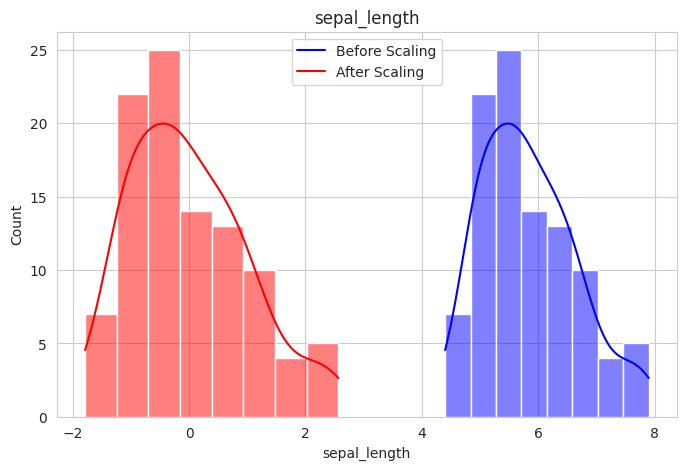

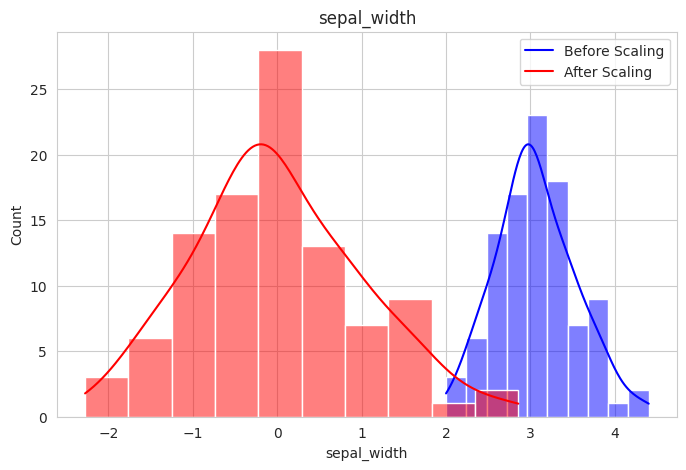

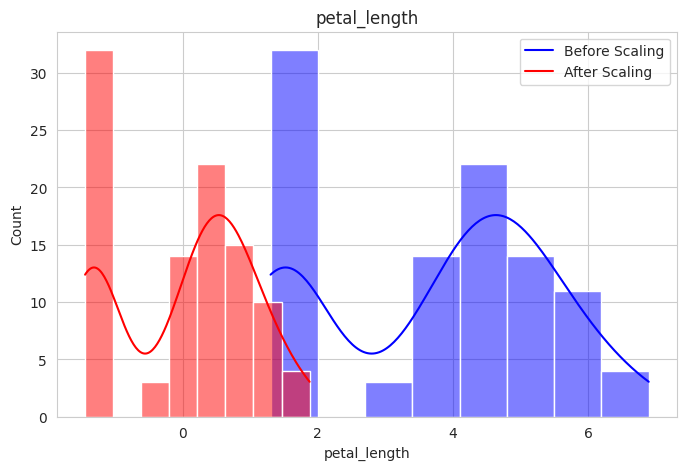

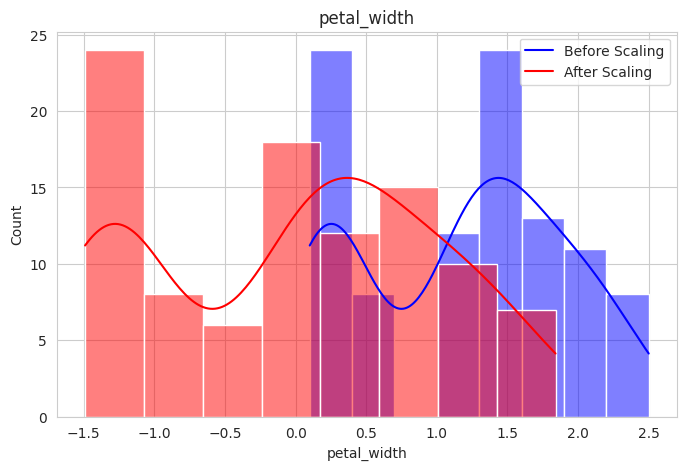

In [38]:
sns.set_style('whitegrid')
for col in X_train.columns:
    fig, axes = plt.subplots(figsize=(8,5))
    sns.histplot(data=X_train, x=col, kde=True, color='b', ax=axes)
    sns.histplot(data=X_train_scaled, x=col, kde=True, color='r', ax=axes)
    axes.set_title(f"{col}")
    axes.legend(labels=['Before Scaling', 'After Scaling'])
    plt.show

### Feature Selection ---- Select relevant features for fitting an ML model. Models with less and more relevant features are simpler to interpret,
#### Reduce chances of overfitting by removing features that may add little info or noise
#### Reduce time needed to train models
#### Reduce feature space when designing or implementing API or Dashboard

### Feature Selection Method: -Filter Method -Wrapper Method -Embedded Method

#### Embedded Method ---- It performs feature selection during the model training. It finds the feature subset for the algorightm that is being trained. It automatically trains an ML model, then derives feature importances from it, removing non-relevant features using the derived feature importance. 

In [39]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train.head()

(100, 4) (100, 1) (50, 4) (50, 1)


,sepal_length,sepal_width,petal_length,petal_width
15,5.7,4.4,1.5,0.4
18,5.7,3.8,1.7,0.3
87,6.3,2.3,4.4,1.3
53,5.5,2.3,4.0,1.3
16,5.4,3.9,1.3,0.4


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
pipeline = Pipeline([
    ("feature_scaling", StandardScaler()),
    ("feature_selection", SelectFromModel(DecisionTreeClassifier(random_state=101))),
    ("model", DecisionTreeClassifier(random_state=101)),
])

pipeline

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=101))),
                ('model', DecisionTreeClassifier(random_state=101))])

In [4]:
pipeline.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [44]:
pipeline['feature_selection'].get_support()

array([False, False,  True,  True])

#### Features selected using feature_selection, SelectFromModel(DecisionTree) algorithm. This will show features considered important in dataset.

In [46]:
X_train.columns[pipeline['feature_selection'].get_support()]

Index(['petal_length', 'petal_width'], dtype='object')

### Split data, fit a model and predict

#### Train and Test sets ----- Validation set is a part of the train set

In [47]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Classification ML task. We will classify the species according to the flower's petal and sepal

In [48]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

#### Step 1 -- Split the data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['species'], axis=1),
                                                            df['species'],
                                                            test_size=0.4,
                                                            random_state=(101))
print("* Train set:", X_train.shape, y_train.shape,"\n* Test set:", X_test.shape, y_test.shape)                                                            

* Train set: (90, 4) (90,) 
* Test set: (60, 4) (60,)


In [51]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,1.4,0.3
51,6.4,3.2,4.5,1.5
118,7.7,2.6,6.9,2.3
136,6.3,3.4,5.6,2.4
84,5.4,3.0,4.5,1.5


In [52]:
y_train.head()

6          setosa
51     versicolor
118     virginica
136     virginica
84     versicolor
Name: species, dtype: object

In [53]:
X_test.head(
    
)

,sepal_length,sepal_width,petal_length,petal_width
33,5.5,4.2,1.4,0.2
16,5.4,3.9,1.3,0.4
43,5.0,3.5,1.6,0.6
129,7.2,3.0,5.8,1.6
50,7.0,3.2,4.7,1.4


In [54]:
y_test.head()

33         setosa
16         setosa
43         setosa
129     virginica
50     versicolor
Name: species, dtype: object

#### Fit the model --- We will use tree-bases algorithms in this case Decision Tree to see workflow with more understanding.
#### Tipically, the last step in the pipeline would be the model fit.

In [55]:
model = DecisionTreeClassifier()

In [56]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

#### Run predictions with .predict() and parse the test set features. The model variable already contains the fitted training variables from the step above with the DecisionTreeClassifier algorithm implemented.

In [57]:
model.predict(X_test)

array(['setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor'], dtype=object)

In [61]:
model.predict_proba(X_test)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1

#### Ideally we should predict on the Train and Test set, set a performance metric and evaluate performance

In [62]:
model.feature_importances_

array([0.        , 0.02529037, 0.04700372, 0.9277059 ])

In [65]:
X_live = pd.DataFrame(data={'sepal_length':6.0,
                            'sepal_width':3.9,
                            'petal_length':2.5,
                            'petal_width':0.9},
                            index=[0]
                            )
X_live                            

,sepal_length,sepal_width,petal_length,petal_width
0,6.0,3.9,2.5,0.9


In [66]:
model.predict(X_live)

array(['versicolor'], dtype=object)

In [67]:
model.predict_proba(X_live)

array([[0., 1., 0.]])

In [68]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### Save the ML model with joblib.dump

In [70]:
import joblib
joblib.dump(value=model, filename="my_first_model.pkl")

['my_first_model.pkl']

In [71]:
load_model=joblib.load(filename="my_first_model.pkl")
load_model

DecisionTreeClassifier()

### Linear Regression

In [5]:
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# Read the dataset into a DataFrame
df = pd.read_csv(data_url)

# Rename the 'price' column to 'target' in the original DataFrame
df.rename(columns={'medv': 'target'}, inplace=True)

# Display the modified DataFrame
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(['target'], axis=1),
                                        df['target'],
                                        test_size=0.2,
                                        random_state=(101))
print("* Train set:", X_train.shape, y_train.shape,"\n* Test set:", X_test.shape, y_test.shape)         

* Train set: (404, 13) (404,) 
* Test set: (102, 13) (102,)


In [22]:

from sklearn.linear_model import LinearRegression
def pipeline_linear_regression():
    pipeline = Pipeline([
        ("feature_scaling", StandardScaler()),
        ("feature_selection", SelectFromModel(LinearRegression())),
        ("model", LinearRegression()),
])

    return pipeline
pipeline_linear_regression()  

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=LinearRegression())),
                ('model', LinearRegression())])

In [23]:
pipeline = pipeline_linear_regression()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=LinearRegression())),
                ('model', LinearRegression())])

In [24]:
def linear_model_coefficients(model, columns):
    print(f"* Intercept: {model.intercept_}")
    coeff_df = pd.DataFrame(model.coef_, columns, columns=['Coefficient']).sort_values(by='Coefficient', key=abs, ascending=False)
    print("* Coefficients")
    print(coeff_df)


In [25]:
pipeline['model']

LinearRegression()

In [26]:
pipeline['feature_selection'].get_support()

array([False, False, False, False,  True,  True, False,  True,  True,
        True,  True, False,  True])

In [27]:
X_train.columns[pipeline['feature_selection'].get_support()]

Index(['nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'lstat'], dtype='object')

In [28]:
linear_model_coefficients(model=pipeline['model'],
                          columns=X_train.columns[pipeline['feature_selection'].get_support()]  )

* Intercept: 22.33688118811881
* Coefficients
         Coefficient
lstat      -4.157136
rm          2.740185
dis        -2.536809
ptratio    -2.201611
nox        -1.849097
rad         1.722235
tax        -1.629525


In [5]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def regression_performance(X_train, y_train, X_test, y_test, pipeline):
    print("Model Evaluation")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline)

def regression_evaluation(X, y, pipeline):
    prediction = pipeline.predict(X)
    print('R2 Score:', r2_score(y, prediction).round(3))
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, prediction)).round(3))
    print("\n")

def regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5):
    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predictions")
    axes[0].set_title("Train Set")
    
    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[1])
    axes[1].set_xlabel("Actual")
    axes[1].set_ylabel("Predictions")
    axes[1].set_title("Test Set")
    
    plt.show()


Model Evaluation
* Train Set
R2 Score: 0.727
Mean Absolute Error: 3.268
Mean Squared Error: 21.077
Root Mean Squared Error: 4.591


* Test Set
R2 Score: 0.676
Mean Absolute Error: 4.259
Mean Squared Error: 36.33
Root Mean Squared Error: 6.027




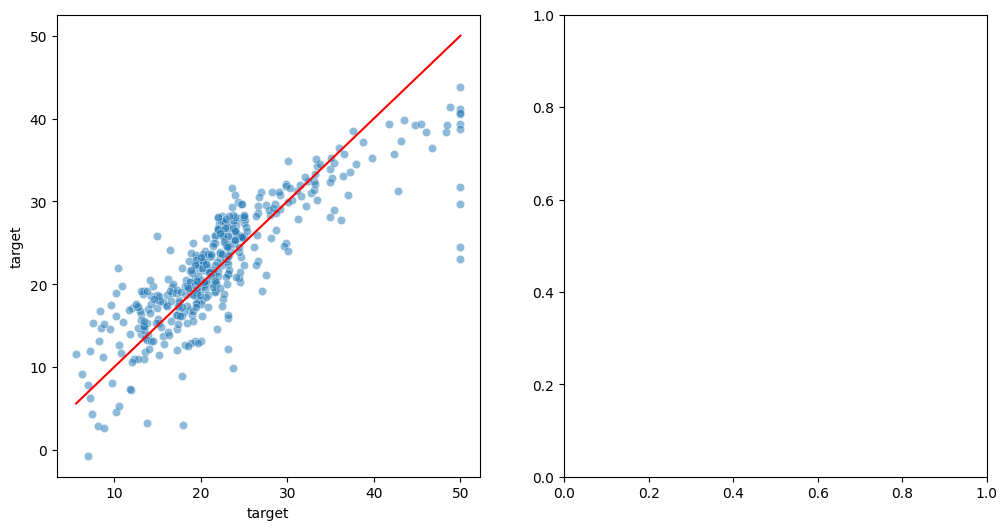

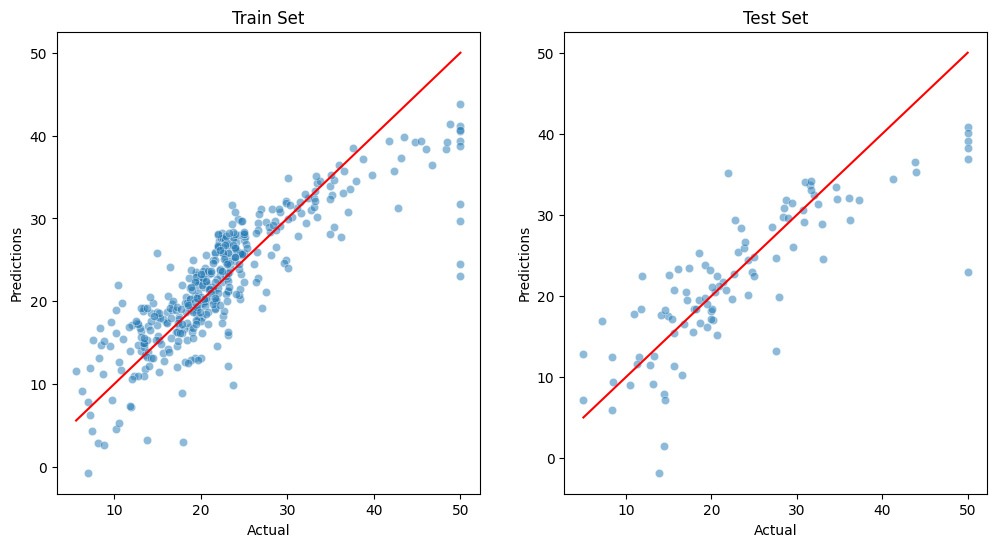

In [30]:
regression_performance(X_train, y_train, X_test, y_test, pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5)

#### Classification: Logistic Regression

In [6]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(['target'], axis=1),
                                        df['target'],
                                        test_size=0.2,
                                        random_state=(101))
print("* Train set:", X_train.shape, y_train.shape,"\n* Test set:", X_test.shape, y_test.shape)         


* Train set: (455, 30) (455,) 
* Test set: (114, 30) (114,)


In [8]:
from sklearn.linear_model import LogisticRegression
def pipeline_logistic_regression():
    pipeline = Pipeline([
        ("feature_scaling", StandardScaler()),
        ("feature_selection", SelectFromModel(LogisticRegression())),
        ("model", LogisticRegression()),
])

    return pipeline
pipeline_logistic_regression()

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression())),
                ('model', LogisticRegression())])

In [9]:
pipeline = pipeline_logistic_regression()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression())),
                ('model', LogisticRegression())])

In [6]:
def logistic_regression_coef(model, columns):
    print(f"* Intercept: {model.intercept_}")
    coeff_df = (pd.DataFrame(model.coef_, index=['Coefficient'], columns=columns)
                .T
                .sort_values(by='Coefficient', key=abs, ascending=False))
    print("* Coefficients")
    print(coeff_df)


In [11]:
logistic_regression_coef(model=pipeline['model'],
                         columns=X_train.columns[pipeline['feature_selection'].get_support()])

* Intercept: [-0.01329706]
* Coefficients
                         Coefficient
worst texture              -1.394183
radius error               -1.341120
worst radius               -1.277818
worst concave points       -1.244126
mean concave points        -1.221412
worst area                 -1.144418
area error                 -1.038283
worst perimeter            -0.937079
fractal dimension error     0.902870
worst concavity            -0.761804
worst fractal dimension    -0.701425
mean concavity             -0.700494
worst smoothness           -0.668297
compactness error           0.631265
mean compactness            0.622440
perimeter error            -0.577948


In [7]:
from sklearn.metrics import classification_report, confusion_matrix

def confusion_matrix_and_report(X, y, pipeline, label_map):
    # Gets features, target, pipeline, and how the levels from your target are labeled (named)
    # in this case, 0 (Malignant) and 1 (Benign), so you parse a list ['Malignant', 'Benign']
    
    # Predict based on features
    prediction = pipeline.predict(X)

    print('--- Confusion Matrix ---')
    print(pd.DataFrame(confusion_matrix(y_true=prediction, y_pred=y),
                       columns=[["Actual " + sub for sub in label_map]],
                       index=[["Prediction " + sub for sub in label_map]]))
    print("\n")
    
    print('--- Classification Report ---')
    print(classification_report(y, prediction, target_names=label_map))
    print("\n")


def clf_performance(X_train, y_train, X_test, y_test, pipeline, label_map):
    # Gets the features and target from the train and test set, pipeline, and how
    # you labeled (named) the levels from your target
    # in this case, 0 (Malignant) and 1 (Benign), so you parse a list ['Malignant', 'Benign']
    
    print("#### Train Set ####")
    confusion_matrix_and_report(X_train, y_train, pipeline, label_map)

    print("#### Test Set ####")
    confusion_matrix_and_report(X_test, y_test, pipeline, label_map)

In [13]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline,
                label_map=['Malignant', 'Benign'])

#### Train Set ####
--- Confusion Matrix ---
                     Actual Malignant Actual Benign
Prediction Malignant              164             2
Prediction Benign                   6           283


--- Classification Report ---
              precision    recall  f1-score   support

   Malignant       0.99      0.96      0.98       170
      Benign       0.98      0.99      0.99       285

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



#### Test Set ####
--- Confusion Matrix ---
                     Actual Malignant Actual Benign
Prediction Malignant               40             0
Prediction Benign                   2            72


--- Classification Report ---
              precision    recall  f1-score   support

   Malignant       1.00      0.95      0.98        42
      Benign       0.97      1.00      0.99        72

    accuracy                           0.9

### Classification task

In [8]:
df_clf = sns.load_dataset('iris').sample(frac=0.7, random_state=101)
print(df_clf.shape)
df_clf.head()

(105, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
33,5.5,4.2,1.4,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
43,5.0,3.5,1.6,0.6,setosa
129,7.2,3.0,5.8,1.6,virginica
50,7.0,3.2,4.7,1.4,versicolor


#### Decision Tree algorithm is like a flow chart where each question has a yes/no answer. We go from a general question to a very specific question as we go deeper. Answers must give us insightful yes or no answers.

#### DecisionTreeRegressor for a regression task and DecisionTreeClassifier for a classificatin task.

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [7]:
df_clf.head()

NameError: name 'df_clf' is not defined

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df_clf.drop(['species'], axis=1),
                                        df_clf['species'],
                                        test_size=0.2,
                                        random_state=(101))
print("* Train set:", X_train.shape, y_train.shape,"\n* Test set:", X_test.shape, y_test.shape)         

* Train set: (84, 4) (84,) 
* Test set: (21, 4) (21,)


In [10]:
def pipeline_decision_tree_clf():
    pipeline = Pipeline([
    ("feature_scaling", StandardScaler()),
    ("feature_selection", SelectFromModel(DecisionTreeClassifier(random_state=101))),
    ("model", DecisionTreeClassifier(random_state=101)),
])

    return pipeline
pipeline_decision_tree_clf()    

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=101))),
                ('model', DecisionTreeClassifier(random_state=101))])

In [11]:
pipeline = pipeline_decision_tree_clf()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=101))),
                ('model', DecisionTreeClassifier(random_state=101))])

In [8]:
def feature_importance_tree_based_models(model, columns):
    """ Gets the mode, and the columns used to train the model
        we use the model.feature_importanes_ and columns to make a DataFrame that shows 
        the importance of each feature and then we print the features name and its relative 
        importance order, followed by a barplot indicating the importance
        """ 
    # Create DataFrame to display feature importance
    df_feature_importance = pd.DataFrame(data={
        'Features': columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    best_features = df_feature_importance['Features'].to_list()

    # Print the most important features and plot the feature importance
    print(f"* These are the {len(best_features)} most important features in descending order. The model was trained on them:")
    print(df_feature_importance['Features'].to_list())

    df_feature_importance.plot(kind='bar', x='Features', y='Importance')
    plt.show()

* These are the 2 most important features in descending order. The model was trained on them:
['petal_width', 'petal_length']


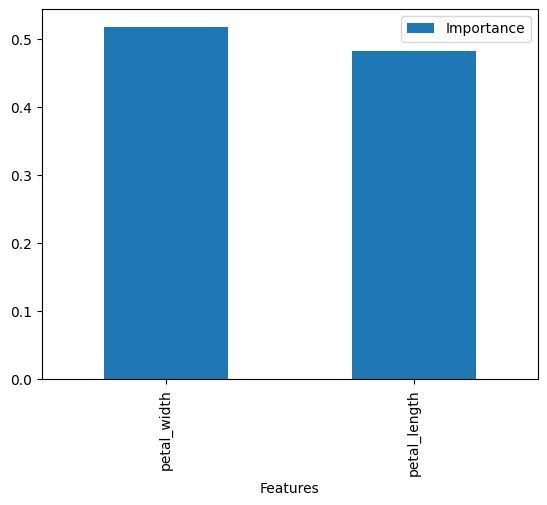

In [12]:
feature_importance_tree_based_models(model=pipeline['model'],
                                     columns = X_train.columns[pipeline['feature_selection'].get_support()])

In [23]:
df_clf['species'].unique()

array(['setosa', 'virginica', 'versicolor'], dtype=object)

In [13]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline,
                label_map=df_clf['species'].unique())

#### Train Set ####
--- Confusion Matrix ---
                      Actual setosa Actual virginica Actual versicolor
Prediction setosa                30                0                 0
Prediction virginica              0               26                 0
Prediction versicolor             0                0                28


--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        30
   virginica       1.00      1.00      1.00        26
  versicolor       1.00      1.00      1.00        28

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



#### Test Set ####
--- Confusion Matrix ---
                      Actual setosa Actual virginica Actual versicolor
Prediction setosa                 8                0                 0
Prediction virginica              0                7                 1

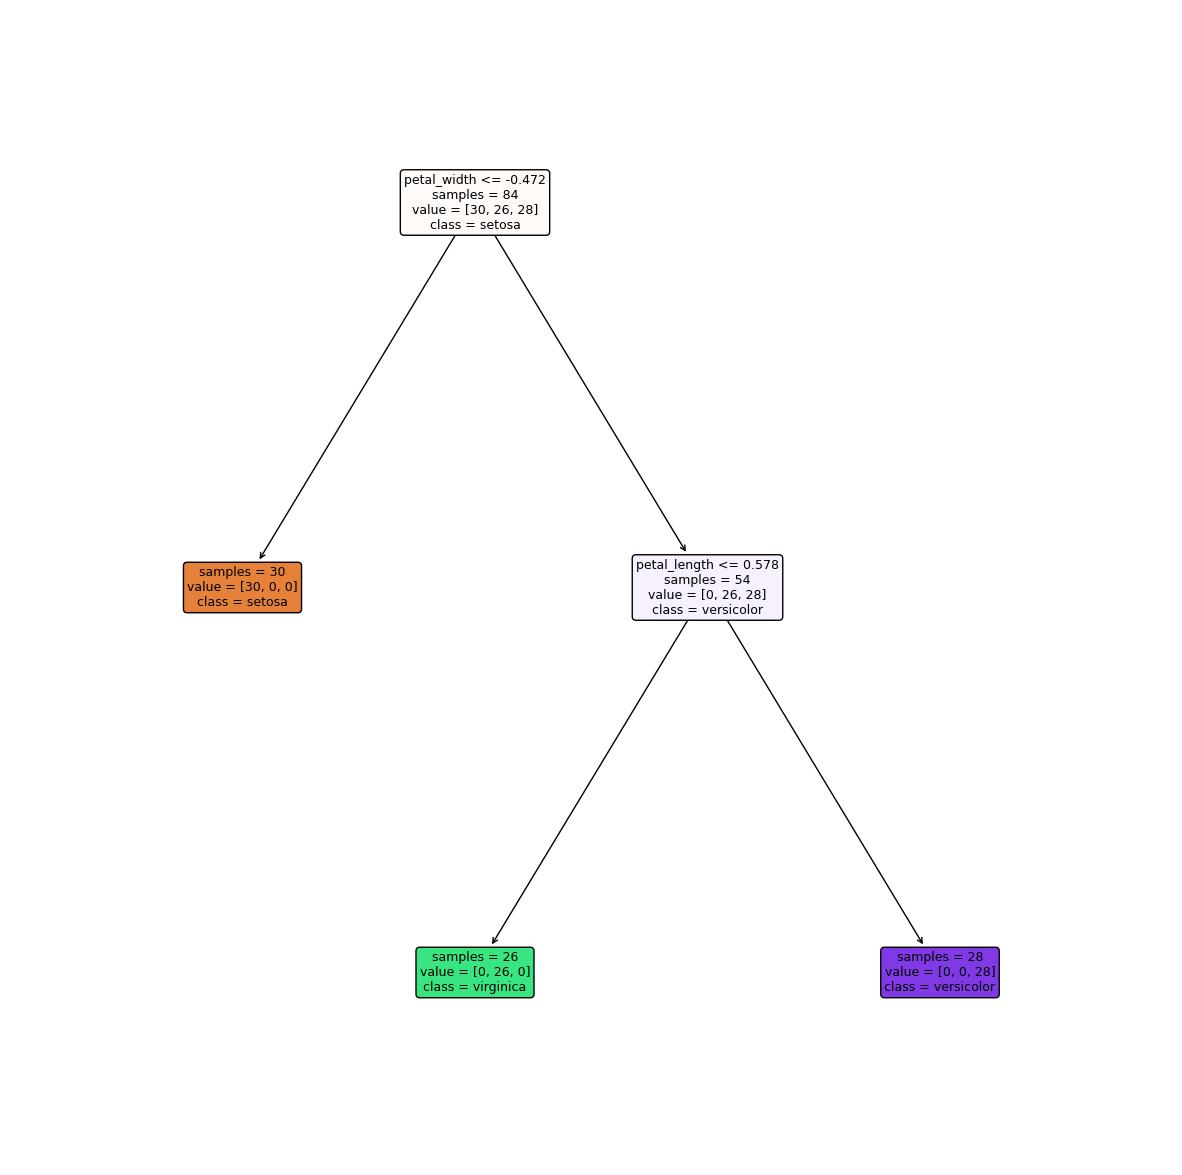

In [15]:
from sklearn import tree
fig = plt.figure(figsize=(15, 15))
tree.plot_tree(decision_tree=pipeline['model'],
               feature_names=X_train.columns[pipeline['feature_selection'].get_support()].tolist(),
               class_names=df_clf['species'].unique().tolist(),
               filled=True,
               rounded=True,
               fontsize=9,
               impurity=False)
plt.show()

### Random Forrest

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [16]:
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# Read the dataset into a DataFrame
df = pd.read_csv(data_url)

# Rename the 'price' column to 'target' in the original DataFrame
df.rename(columns={'medv': 'price'}, inplace=True)
df = df.sample(frac=0.5, random_state=101)

# Display the modified DataFrame
df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
195,0.01381,80.0,0.46,0,0.422,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
434,13.91340,0.0,18.10,0,0.713,6.208,95.0,2.2222,24,666,20.2,100.63,15.17,11.7


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(['price'], axis=1),
                                        df['price'],
                                        test_size=0.2,
                                        random_state=(101))
print("* Train set:", X_train.shape, y_train.shape,"\n* Test set:", X_test.shape, y_test.shape)         



* Train set: (202, 13) (202,) 
* Test set: (51, 13) (51,)


In [20]:
def pipeline_random_forest_reg():
    pipeline = Pipeline([
        ("feature_scaling", StandardScaler()),
        ("feature_selection", SelectFromModel(RandomForestRegressor(random_state=101))),
        ("model", RandomForestRegressor(random_state=101)),
])

    return pipeline
pipeline_random_forest_reg()  

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                ('model', RandomForestRegressor(random_state=101))])

In [21]:
pipeline = pipeline_random_forest_reg()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                ('model', RandomForestRegressor(random_state=101))])

* These are the 2 most important features in descending order. The model was trained on them:
['lstat', 'rm']


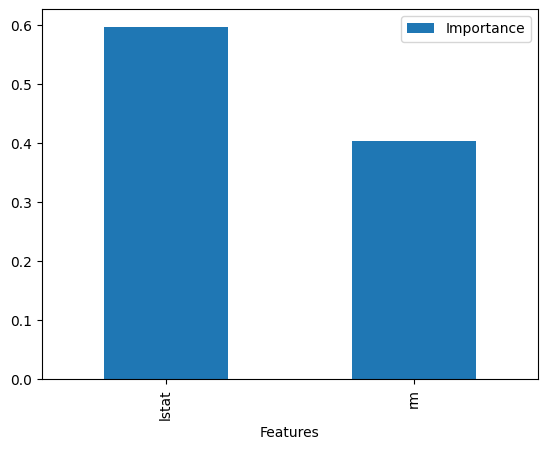

In [22]:
feature_importance_tree_based_models(model = pipeline['model'],
                                     columns = X_train.columns[pipeline['feature_selection'].get_support()])

Model Evaluation
* Train Set
R2 Score: 0.952
Mean Absolute Error: 1.409
Mean Squared Error: 4.917
Root Mean Squared Error: 2.217


* Test Set
R2 Score: 0.714
Mean Absolute Error: 3.596
Mean Squared Error: 23.525
Root Mean Squared Error: 4.85




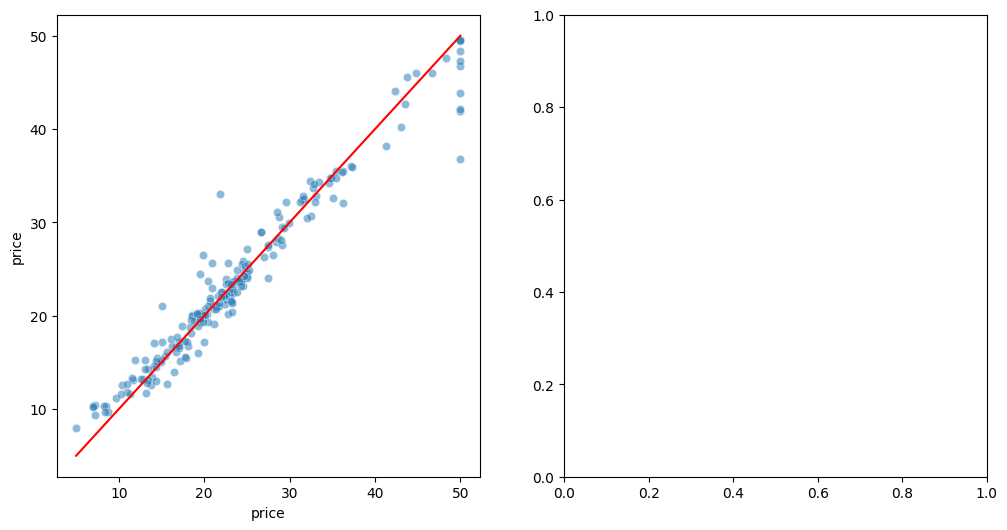

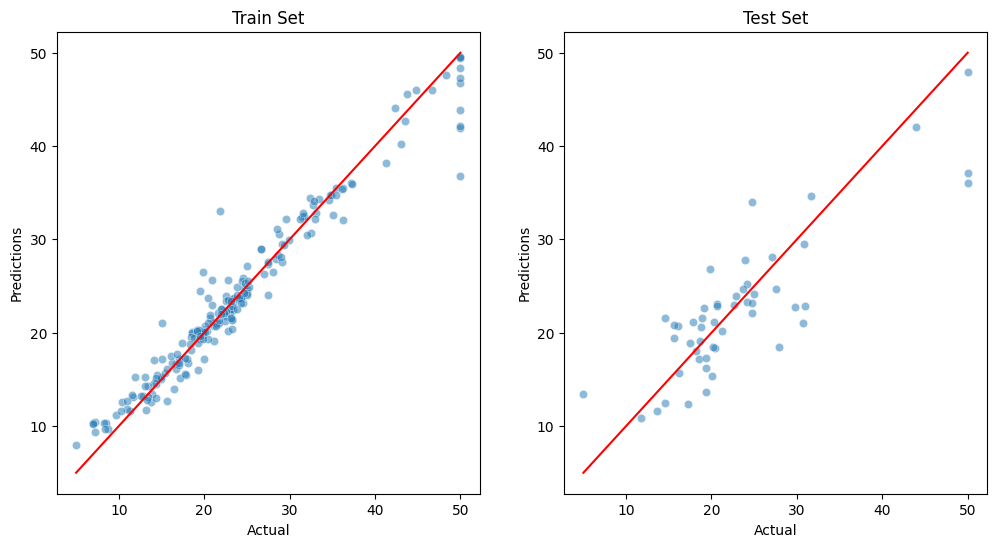

In [45]:
regression_performance(X_train, y_train, X_test, y_test, pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5)

#### Gradient Booster ----- Building a sequence of initially weak models into increasingly more powerful models. 

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [10]:
df_clf = sns.load_dataset('iris').sample(frac=0.7, random_state=101)
print(df_clf.shape)
df_clf.head()

(105, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
33,5.5,4.2,1.4,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
43,5.0,3.5,1.6,0.6,setosa
129,7.2,3.0,5.8,1.6,virginica
50,7.0,3.2,4.7,1.4,versicolor


In [11]:
df_clf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
33,5.5,4.2,1.4,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
43,5.0,3.5,1.6,0.6,setosa
129,7.2,3.0,5.8,1.6,virginica
50,7.0,3.2,4.7,1.4,versicolor


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df_clf.drop(['species'], axis=1),
                                        df_clf['species'],
                                        test_size=0.2,
                                        random_state=(101))
print("* Train set:", X_train.shape, y_train.shape,"\n* Test set:", X_test.shape, y_test.shape)         

* Train set: (84, 4) (84,) 
* Test set: (21, 4) (21,)


In [13]:
def pipeline_gradient_boost_clf():
    pipeline = Pipeline([
        ("feature_scaling", StandardScaler()),
        ("feature_selection", SelectFromModel(GradientBoostingClassifier(random_state=101))),
        ("model", GradientBoostingClassifier(random_state=101)),
])

    return pipeline
pipeline_gradient_boost_clf()  

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=GradientBoostingClassifier(random_state=101))),
                ('model', GradientBoostingClassifier(random_state=101))])

In [15]:
pipeline = pipeline_gradient_boost_clf()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=GradientBoostingClassifier(random_state=101))),
                ('model', GradientBoostingClassifier(random_state=101))])

* These are the 1 most important features in descending order. The model was trained on them:
['petal_length']


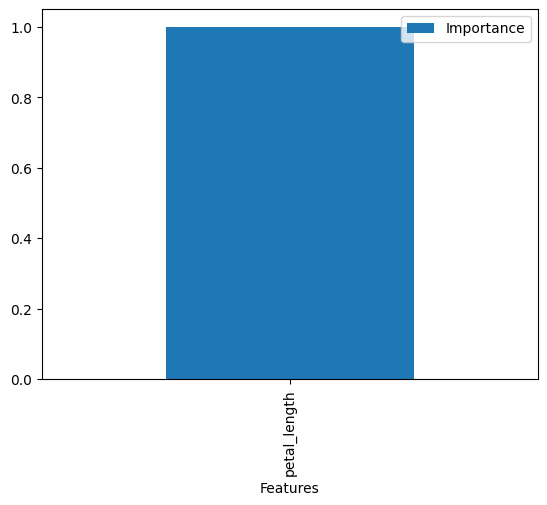

In [16]:
feature_importance_tree_based_models(model=pipeline['model'],
                                     columns = X_train.columns[pipeline['feature_selection'].get_support()])

In [17]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline,
                label_map=df_clf['species'].unique())

#### Train Set ####
--- Confusion Matrix ---
                      Actual setosa Actual virginica Actual versicolor
Prediction setosa                30                0                 0
Prediction virginica              0               26                 0
Prediction versicolor             0                0                28


--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        30
   virginica       1.00      1.00      1.00        26
  versicolor       1.00      1.00      1.00        28

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



#### Test Set ####
--- Confusion Matrix ---
                      Actual setosa Actual virginica Actual versicolor
Prediction setosa                 8                0                 0
Prediction virginica              0                7                 1